In [77]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import os
import itertools
import numpy.ma as ma
from tqdm import tqdm

In [115]:
file_path = os.listdir('cleaned_data')
file_path

['家具制造业.csv',
 '石油加工、炼焦及核燃料加工业.csv',
 '非金属矿物制造业.csv',
 '通用设备制造业.csv',
 '农业.csv',
 '建筑安装业.csv',
 '金属制品业.csv',
 '邮政业.csv',
 '其他制造业.csv',
 '燃气生产和供应业.csv',
 '生态保护和环境治理业.csv',
 '住宿业.csv',
 '黑色金属矿采选业.csv',
 '专用设备制造业.csv',
 '黑色金属加工.csv',
 '机动车、电子产品和日用品服务业.csv',
 '公共设施管理业.csv',
 '卫生业.csv',
 '计算机、通信和其他电子设备制造业.csv',
 '畜牧业.csv',
 '餐饮业.csv',
 '煤炭开采和洗选业.csv',
 '研究和试验发展.csv',
 '道路运输业.csv',
 '仪器仪表制造业.csv',
 '建筑装饰和其他安装业.csv',
 '电力、热力生产和供应业.csv',
 '农、林、牧、渔服务业.csv',
 '林业.csv',
 '航空运输业.csv',
 '专业技术服务业.csv',
 '仓储业.csv',
 '农副食品加工业.csv',
 '铁路、船舶、航空航天和其他运输模式设备制造业.csv',
 '石油和天然气开采业.csv',
 '电信、广播电视和卫星传输服务.csv',
 '零售业.csv',
 '文化艺术业.csv',
 '房屋建筑业.csv',
 '电气机械及器材制造业.csv',
 '酒、饮料和精制茶制造业.csv',
 '化学原料及化学制品制造业.csv',
 '教育业.csv',
 '土木工程建筑业.csv',
 '纺织服装、服饰业.csv',
 '文教、工美、体育和娱乐用品制造业.csv',
 '有色金属加工.csv',
 '装卸搬运及其他运输代理.csv',
 '食品制造业.csv',
 '商务服务业.csv',
 '货币金融服务.csv',
 '纺织业.csv',
 '木材加工及木、竹、藤、棕、草制品业.csv',
 '铁路运输业.csv',
 '租赁业.csv',
 '皮革、毛皮、羽毛及其.csv',
 '科技推广和应用服务业.csv',
 '广播、电视、电影和影视录音制作业.csv',
 '资本市场服务.csv',
 '有色金属矿采选业.csv',

In [79]:
whole = []
for i in range(len(file_path)):
    df = pd.read_csv('cleaned_data/'+file_path[i],index_col=0)
    whole.append(df)
whole1 = pd.concat(whole)
# whole1.to_json('cleaned_data.json')

In [80]:
whole1['return'] = np.log(whole1['收盘价(元)'])-np.log(whole1['开盘价(元)'])

In [81]:
one_year = whole1[whole1['year']==2010]

In [82]:
industry_combinations =list(itertools.combinations([x[:-4] for x in file_path],2))

In [99]:
industry_coef = []
for i in tqdm(range(len(industry_combinations))):
# for i in tqdm(range(100)):

    corporate_coef = []
    tmp1 = one_year[one_year['industry']==industry_combinations[i][0]].dropna()
    tmp2 = one_year[one_year['industry']==industry_combinations[i][1]].dropna()
    corporate1 = tmp1['简称'].drop_duplicates()
    corporate2 = tmp2['简称'].drop_duplicates()
    combination = []
    for j in  range(len(corporate1)):
        for k in range(len(corporate2)):
            combination.append((corporate1.iloc[j],corporate2.iloc[k]))
    for m in range(len(combination)):
        try:
            a = np.corrcoef(tmp1[tmp1['简称']==combination[m][0]]['return'],tmp2[tmp2['简称']==combination[m][1]]['return'])[0,1]*np.average(tmp1[tmp1['简称']==combination[m][0]]['weight'])*np.average(tmp2[tmp2['简称']==combination[m][1]]['weight'])
            # print(a)
            if np.isnan(a) == False:
                corporate_coef.append(a)
            
            else:
                # print(a)
                continue
        except ValueError:
            continue
    # print((industry_combinations[i][0],industry_combinations[i][1],sum(corporate_coef)))
    industry_coef.append((industry_combinations[i][0],industry_combinations[i][1],sum(corporate_coef)))

    # print('*******')
            

100%|██████████| 3081/3081 [1:46:09<00:00,  2.07s/it]


In [110]:
import networkx as nx 


plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

In [111]:
G = nx.Graph()
G.add_weighted_edges_from(industry_coef)

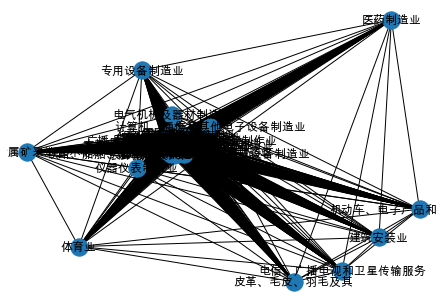

In [112]:
nx.draw(G,with_labels = True)

In [128]:
A=pd.DataFrame(nx.adjacency_matrix(G).todense())
columns = [x[:-4] for x in file_path]
A.columns=columns

In [134]:
A['index']=columns
A.index=A['index']
A = A.iloc[:,:-1]

,家具制造业,石油加工、炼焦及核燃料加工业,非金属矿物制造业,通用设备制造业,农业,建筑安装业,金属制品业,邮政业,其他制造业,燃气生产和供应业,...,化学纤维制造业,渔业,体育业,新闻和出版业,医药制造业,批发业,互联网和相关服务,软件和信息技术服务业,造纸及纸制品业,其他金融业
index,,,,,,,,,,,,,,,,,,,,,
家具制造业,0.000000,0.395512,0.376834,0.402968,0.368861,0.0,0.345866,0.265099,0.223574,0.422176,...,0.375808,0.384188,0.0,0.328741,-0.055013,0.362922,0.324025,0.304229,0.417702,0.361197
石油加工、炼焦及核燃料加工业,0.395512,0.000000,0.391092,0.408645,0.371952,0.0,0.368844,0.257843,0.234350,0.464985,...,0.406498,0.387426,0.0,0.299942,-0.055006,0.383376,0.331757,0.300123,0.449201,0.430917
非金属矿物制造业,0.376834,0.391092,0.000000,0.383500,0.365660,0.0,0.340079,0.229052,0.229018,0.399851,...,0.367834,0.375721,0.0,0.284297,-0.038691,0.348044,0.300010,0.296177,0.407869,0.339854
通用设备制造业,0.402968,0.408645,0.383500,0.000000,0.395127,0.0,0.371218,0.244310,0.243355,0.434998,...,0.375529,0.372776,0.0,0.312594,-0.032348,0.376470,0.320357,0.325220,0.438558,0.339801
农业,0.368861,0.371952,0.365660,0.395127,0.000000,0.0,0.342685,0.218569,0.255023,0.407082,...,0.365620,0.441771,0.0,0.297155,0.032143,0.339211,0.292418,0.304129,0.386206,0.309778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
批发业,0.362922,0.383376,0.348044,0.376470,0.339211,0.0,0.333689,0.227989,0.220538,0.394434,...,0.359916,0.336538,0.0,0.284295,-0.026812,0.000000,0.293748,0.289192,0.396599,0.333199
互联网和相关服务,0.324025,0.331757,0.300010,0.320357,0.292418,0.0,0.277696,0.208697,0.198135,0.349357,...,0.313601,0.314006,0.0,0.267365,-0.040123,0.293748,0.000000,0.281803,0.345577,0.230563
软件和信息技术服务业,0.304229,0.300123,0.296177,0.325220,0.304129,0.0,0.277235,0.191778,0.206670,0.324516,...,0.303516,0.312432,0.0,0.270324,-0.022174,0.289192,0.281803,0.000000,0.333910,0.196013
